#Adding shortcut of Derq_rishab to my drive

In [2]:
%cd drive/MyDrive/Derq_rishab

/content/drive/.shortcut-targets-by-id/1S6PHLtKubaEmb4elW0O0IDX8bsusIp-u/Derq_rishab


# Cloning deep sort library for tracking

In [3]:
# # Clone the deep_sort_pytorch repository
!git clone https://github.com/ZQPei/deep_sort_pytorch.git
%cd deep_sort_pytorch
!pip install -r requirements.txt

fatal: destination path 'deep_sort_pytorch' already exists and is not an empty directory.
/content/drive/.shortcut-targets-by-id/1S6PHLtKubaEmb4elW0O0IDX8bsusIp-u/Derq_rishab/deep_sort_pytorch
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 82.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.8/172.8 kB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
%cd ..

/content/drive/.shortcut-targets-by-id/1S6PHLtKubaEmb4elW0O0IDX8bsusIp-u/Derq_rishab


# Loading Yolov5 model

In [5]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'yolov5x6') # Loading x6 model to get better detections

/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 212.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 218.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 7.2s, installed 3 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-7-8 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients, 209.6 GFLOPs
Adding AutoShape... 


In [6]:
import torch
import cv2
import numpy as np
import pandas as pd
import os
import gdown
from deep_sort_pytorch.utils.parser import get_config
from deep_sort_pytorch.deep_sort import DeepSort
import os
from PIL import Image
from google.colab.patches import cv2_imshow

# Defining Basic functions

## Downloading and initializing deepsort

In [7]:
# Define the path to the DeepSORT weights
REID_CKPT = "deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7"

# # Function to download DeepSORT weights if not present
# def download_deepsort_weights():
#     if not os.path.exists(REID_CKPT):
#         os.makedirs(os.path.dirname(REID_CKPT), exist_ok=True)
#         url = "https://drive.google.com/uc?id=1_6PxmAcjS6iR2Y4StbVZG6gLPZ1U7v-W"
#         gdown.download(url, REID_CKPT, quiet=False)
#         print("DeepSORT weights downloaded.")

# Initialize YOLOv5 model

# Initialize DeepSORT
def init_deepsort():
    cfg = get_config()
    cfg.merge_from_file("deep_sort_pytorch/configs/deep_sort.yaml")
    deepsort = DeepSort(
        REID_CKPT,
        max_dist=cfg.DEEPSORT.MAX_DIST,
        min_confidence=cfg.DEEPSORT.MIN_CONFIDENCE,
        nms_max_overlap=cfg.DEEPSORT.NMS_MAX_OVERLAP,
        max_iou_distance=cfg.DEEPSORT.MAX_IOU_DISTANCE,
        max_age=cfg.DEEPSORT.MAX_AGE,
        n_init=cfg.DEEPSORT.N_INIT,
        nn_budget=cfg.DEEPSORT.NN_BUDGET,
        use_cuda=True
    )
    return deepsort

## Detecting only car class using yolov5

In [8]:
def detect_vehicles(frame):
    results = model(frame)

    detections = results.pandas().xyxy[0]  # Convert results to pandas DataFrame

    # Filter detections for the "car" class
    car_detections = detections[detections['name'] == 'car']

    return car_detections

## Tracking cars using deepsort

In [9]:
def track_vehicles(deepsort, detections, frame):
    bbox_xywh = []
    confs = []
    classes = []  # List to store object classes

    for index, row in detections.iterrows():

            x1, y1, x2, y2 = row['xmin'], row['ymin'], row['xmax'], row['ymax']
            bbox_xywh.append([(x1 + x2) / 2, (y1 + y2) / 2, x2 - x1, y2 - y1])
            confs.append(row['confidence'])
            classes.append(row['class'])
            # print(x1, y1, x2, y2)

    if len(bbox_xywh) == 0:
        return np.empty((0, 6), dtype=np.int32)  # Return an empty array if no cars detected

    bbox_xywh = np.array(bbox_xywh)
    confs = np.array(confs)
    classes = np.array(classes)

    # Ensure frame is converted to BGR format (as required by cv2)
    frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    # Call DeepSort update method
    outputs, _ = deepsort.update(bbox_xywh, confs, classes, frame_bgr)

    return outputs


## IOU code to check at time of collision

In [10]:
def calculate_iou(box1, box2):
    # Calculate the intersection area
    x1_inter = max(box1[0], box2[0])
    y1_inter = max(box1[1], box2[1])
    x2_inter = min(box1[2], box2[2])
    y2_inter = min(box1[3], box2[3])

    inter_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)

    # Calculate the area of both bounding boxes
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Calculate the union area
    union_area = box1_area + box2_area - inter_area

    # Calculate the IoU
    iou = inter_area / union_area if union_area > 0 else 0

    return iou

## Code for detecting collisions

**Constraints to be a collision**

*   Distance threshold should be less than adjusted base threshold (adjusted based on size of bounding boxes)
*   At the time of collision the bounding boxes of 2 vehicles should have IOU of over base_iou_threshold
*   The size of bounding box of both the cars should not be less than certain ratio (to avoid false detection for vehicles too far)

In [11]:
def detect_collisions(tracks, base_collision_threshold, iou_threshold=0.2, size_ratio_threshold=0.1):
    collisions = []

    # Extracting track IDs and their positions
    track_ids = list(tracks.keys())

    # Find the size of the largest vehicle in the frame
    max_size = 0
    for track_id in track_ids:
        last_pos = tracks[track_id][-1]
        size = (last_pos[2] - last_pos[0]) * (last_pos[3] - last_pos[1])
        if size > max_size:
            max_size = size

    # Iterate through each pair of different tracks
    for i in range(len(track_ids)):
        for j in range(i + 1, len(track_ids)):
            track_id1 = track_ids[i]
            track_id2 = track_ids[j]

            # Get the last positions of the two tracks
            last_pos1 = tracks[track_id1][-1]
            last_pos2 = tracks[track_id2][-1]

            # Calculate centers of the bounding boxes
            center1 = np.array([(last_pos1[0] + last_pos1[2]) / 2, (last_pos1[1] + last_pos1[3]) / 2])
            center2 = np.array([(last_pos2[0] + last_pos2[2]) / 2, (last_pos2[1] + last_pos2[3]) / 2])
            distance = np.linalg.norm(center1 - center2)

            # Calculate the sizes (areas) of the bounding boxes
            size1 = (last_pos1[2] - last_pos1[0]) * (last_pos1[3] - last_pos1[1])
            size2 = (last_pos2[2] - last_pos2[0]) * (last_pos2[3] - last_pos2[1])

            # Adjust the collision threshold based on the sizes of the bounding boxes
            adjusted_threshold = base_collision_threshold * ((size1 + size2) ** 0.5) / 500  # Adjusting the scaling factor

            # Calculate IoU
            iou = calculate_iou(last_pos1, last_pos2)

            # Check size ratio relative to the largest vehicle
            size_ratio1 = size1 / max_size
            size_ratio2 = size2 / max_size

            # Check if distance is less than the adjusted collision threshold, IoU is greater than the threshold,
            # and both vehicles are reasonably large compared to the largest vehicle in the frame
            if distance < adjusted_threshold and iou > iou_threshold and size_ratio1 > size_ratio_threshold and size_ratio2 > size_ratio_threshold:
                collision_point = ((last_pos1[0] + last_pos2[0]) // 2, (last_pos1[1] + last_pos2[1]) // 2)
                collisions.append({'id1': track_id1, 'id2': track_id2, 'location': collision_point})
                # print(track_id1, track_id2, distance, adjusted_threshold, iou, size_ratio1, size_ratio2)

    return collisions

## Drawing detection boxes

In [12]:
def format_results(collisions):
    return collisions

def draw_tracks(frame, tracks):
    # print("frame",frame.shape)
    # print("tracks",tracks)
    for bbox, track_id in tracks:

        x1, y1, x2, y2 = map(int, bbox)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, str(track_id), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)


In [25]:
import os
from PIL import Image, UnidentifiedImageError

def display_last_image(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)

    # Filter out only image files (you can add more extensions if needed)
    image_files = [f for f in files if f.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp', 'tiff'))]

    # Sort the image files by modification time
    image_files.sort(key=lambda x: os.path.getmtime(os.path.join(folder_path, x)))

    # Try to find and display the last valid image file
    for image_file in reversed(image_files):
        last_image_path = os.path.join(folder_path, image_file)
        try:
            return last_image_path
        except UnidentifiedImageError:
            print(f"Skipping invalid image file: {last_image_path}")

    print("No valid image files found in the folder.")



## Sequencing all the functions to use in main code

In [16]:
import torch
import cv2
import json
import numpy as np

def main(video_path, collision_threshold, iou_threshold ,size_ratio_threshold, output_video_path, detections_output, collisions_output, frame_folder):
    # Initialize DeepSORT
    deepsort = init_deepsort()

    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    tracks = {}

    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))
    frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    # print(frames)


    detection_results = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Detect vehicles using YOLO
        detections = detect_vehicles(frame)
        outputs = track_vehicles(deepsort, detections, frame)

        detection_dicts = []
        for index, row in detections.iterrows():
            detection_dict = {
                'xmin': row['xmin'],
                'ymin': row['ymin'],
                'xmax': row['xmax'],
                'ymax': row['ymax'],
                'confidence': row['confidence'],
                'class': row['class']
            }
            detection_dicts.append(detection_dict)

        detection_results.append({
            'frame_id': frame_count,
            'detections': detection_dicts
        })

        # Track vehicles and update tracks dictionary
        frame_tracks = []
        for output in outputs:
            track_id = output[-1]
            bbox = output[:4]
            frame_tracks.append((bbox, track_id))
            if track_id not in tracks:
                tracks[track_id] = []
            tracks[track_id].append((*bbox, frame_count))

        # Draw tracked vehicles on the frame
        draw_tracks(frame, frame_tracks)

        # Detect collisions and visualize on frame
        if frame_count%30 ==0 and frame_count>frames//2: #Checking after every 30 frames when greater than half of frames
          collisions = detect_collisions(tracks, base_collision_threshold=collision_threshold, iou_threshold=iou_threshold, size_ratio_threshold=size_ratio_threshold)

          # Saving the frame of collision
          for collision in collisions:
              # Highlight collision location on frame
              collision_location = collision['location']

              # Save the frame where collision occurs (optional)
              name = frame_folder + '/' + str(frame_count)+'.jpg'
              cv2.imwrite(name, frame)

        # Write frame with annotations to output video
        out.write(frame)
        frame_count += 1

    cap.release()
    out.release()

    # Save detection results to JSON file
    with open(detections_output, 'w') as f:
        json.dump(detection_results, f)

    collisions = detect_collisions(tracks, base_collision_threshold=collision_threshold, iou_threshold=iou_threshold, size_ratio_threshold=size_ratio_threshold)


    # Format collision results and save to JSON file
    collision_results = format_results(collisions)
    for entry in collision_results:
      entry['id1'] = int(entry['id1'])
      entry['id2'] = int(entry['id2'])
      entry['location'] = tuple(map(int, entry['location']))
    with open(collisions_output, 'w') as f:
        json.dump(collision_results, f)

    print("Processing complete. Outputs saved.")
    return tracks


# Testing

## Parameters defined

In [17]:
collision_threshold = 500  # Finetuned
iou_threshold = 0.05
size_ratio_threshold = 0.1

## Video 14

In [18]:
video_path = '/content/drive/MyDrive/Derq/carla_crashes/vid_14.mp4'
output_video_path = 'results14/output_vid.mp4'
detections_output = 'results14/detections.json'
collisions_output = 'results14/collisions.json'
frame_folder = "results14/frames_of_collision"
tracks14 = main(video_path, collision_threshold,iou_threshold, size_ratio_threshold, output_video_path, detections_output, collisions_output,frame_folder)

WARNING ⚠️ NMS time limit 0.550s exceeded


Processing complete. Outputs saved.


In [19]:
data14 = json.load(open(collisions_output))
data14

[{'id1': 4, 'id2': 5, 'location': [47, 132]},
 {'id1': 5, 'id2': 9, 'location': [19, 192]}]



> Got (4,5) crash right  
> But got additional (5,9) as false positive



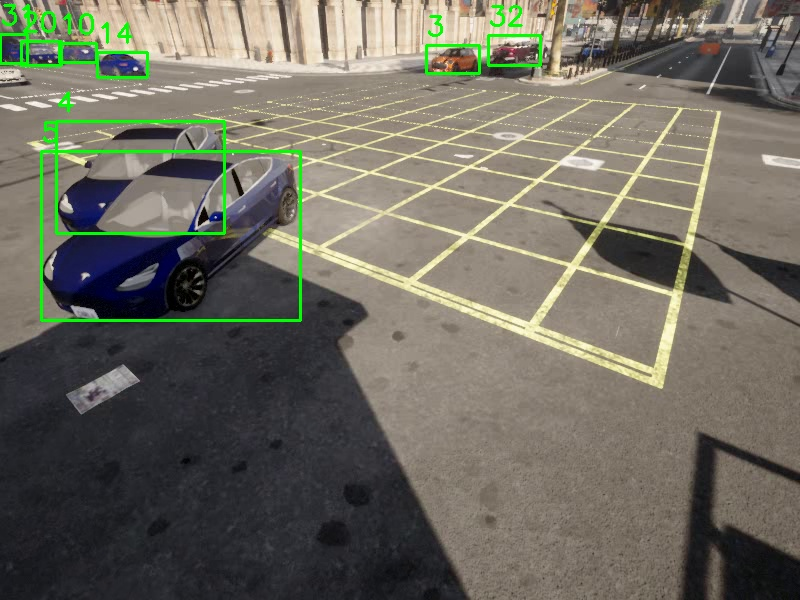

In [27]:
frame_folder = "results14/frames_of_collision"
name = display_last_image(frame_folder)
img = cv2.imread(name)
cv2_imshow(img)

## Video 4

In [83]:
video_path = '/content/drive/MyDrive/Derq/carla_crashes/vid_4.mp4'
output_video_path = 'results4/output_vid.mp4'
detections_output = 'results4/detections.json'
collisions_output = 'results4/collisions.json'
frame_folder = "results4/frames_of_collision"
tracks4 = main(video_path, collision_threshold, output_video_path, detections_output, collisions_output,frame_folder)

Processing complete. Outputs saved.


In [84]:
data4 = json.load(open(collisions_output))
data4

[{'id1': 8, 'id2': 18, 'location': [209, 259]},
 {'id1': 11, 'id2': 14, 'location': [562, 133]}]


> Got (8,18) crash right  
> But got additional (11,14) as false positive

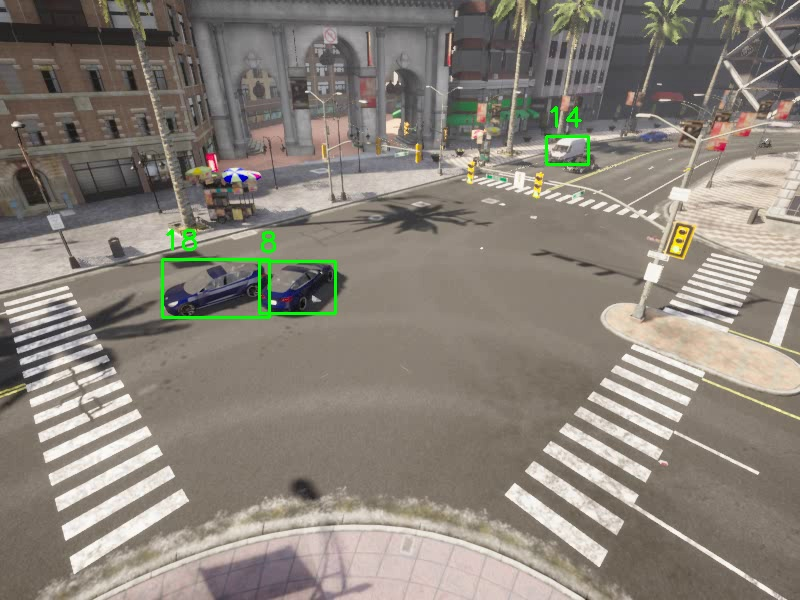

In [85]:
frame_folder = "results4/frames_of_collision"
name = display_last_image(frame_folder)
img = cv2.imread(name)
cv2_imshow(img)

## Video 6

In [86]:
video_path = '/content/drive/MyDrive/Derq/carla_crashes/vid_6.mp4'
output_video_path = 'results6/output_vid.mp4'
detections_output = 'results6/detections.json'
collisions_output = 'results6/collisions.json'
frame_folder = "results6/frames_of_collision"
tracks6 = main(video_path, collision_threshold, output_video_path, detections_output, collisions_output,frame_folder)

Processing complete. Outputs saved.


In [87]:
data6 = json.load(open(collisions_output))
data6

[{'id1': 2, 'id2': 4, 'location': [543, 109]}]

> Got (2,4) crash right  
> No wrong

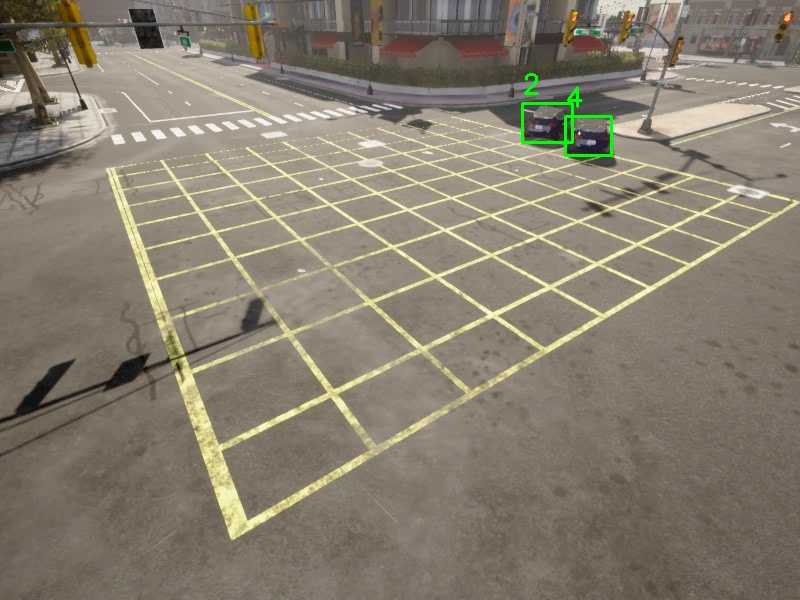

In [88]:
frame_folder = "results6/frames_of_collision"
name = display_last_image(frame_folder)
img = cv2.imread(name)
cv2_imshow(img)